## Proyecto de Análisis de datos


## Introducción

El objetivo de este cuaderno de Jupyter es buscar valores faltantes, valores atípicos/extremos u outliers, registros duplicados y la eliminación de las columnas y/o filas que considere innecesarias. También, de ser necesario, renombraré ciertas columnas que me parezca que no cuenten con un nombre adecuado/descriptivo. También utilizaré gráficos coherentes según la tipología de variable que corresponda en cada caso.

Este proyecto nace cómo iniciativa del Bootcamp de SoyHenry para desarrollar y poner a prueba mis habilidades en el área del análisis de datos. Para el mismo, me proporcinan 2 Datasets contenidos en un archivo en formato .xlsx, en hojas distintas. 
Los datasets contienen en su interior datos acerca de siniestros víales ocurridos en la ciudad de Buenos Aires en el periodo 2016-2022, proporcionados por el gobierno de esa misma provincia. Hay una tabla de Hechos, que contiene justamente cómo su nombre indica, siniestros víales que ocurrieron en determinado tiempo y lugar de la provincia; y también hay otra tabla, llamada Victimas, que contiene detalles acerca de las personas fallecidas en determinado accidente asociado con la tabla Hechos.

# Carga de datos

El primer paso es importar las librerías necesarias para este proyecto. 

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')

A continuación, voy a cargar las tablas en dos Dataframe de la librería Pandas, uno para Hechos y otro para Victimas

In [166]:
Hechos = pd.read_excel('Datasets/homicidios.xlsx')
Victimas = pd.read_excel('Datasets/homicidios.xlsx', sheet_name="VICTIMAS")

# Inspección inicial de los datos

Muestro la cabecera de ambas tablas

In [167]:
Hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [168]:
Hechos.info() # A primera vista, pareciera que la mayoría de las columnas no tienen valores faltantes, pero haciendo referencia al diccionario de datos, los valores faltantes están representados con un string "SD" (sin dato)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [169]:
Victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [170]:
Victimas.info() # A primera vista, pareciera que todas las filas y columnas no tienen valores faltantes, pero nuevamente, hay valores "SD" presentes en la tabla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Para comenzar a entender los datos con los que voy a trabajar a continuación, necesito saber varios datos, cómo el tamaño de las tablas, el tipo de datos de cada columna y una descripción breve de la tabla.
Eso voy a hacer a continuación

Comencemos con la forma / tamaño de las tablas

In [171]:
print(Hechos.shape) # La tabla de hechos tiene originalmente 696 filas y 21 columnas
print(Victimas.shape) # La tabla de victimas tiene originalmente 717 filas y 10 columnas

(696, 21)
(717, 10)


Ahora exploremos el nombre de las distintas columnas que tenemos en ambas tablas

In [172]:
Hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Voy a definir por un lado las columnas cualitativas y por otro las cuantitativas

- Cualitativas:
    -'ID'
    -'FECHA'
    -'AAAA'
    -'MM'
    -'DD'
    -'HORA'
    -'HH',
    -'LUGAR_DEL_HECHO'
    -'TIPO_DE_CALLE'
    -'Calle'
    -'Altura'
    -'Cruce'
    -'Dirección Normalizada'
    -'COMUNA'
    -'XY (CABA)'
    -'pos x'
    -'pos y'
    -'PARTICIPANTES'
    -'VICTIMA'
    -'ACUSADO'
    
- Cuantitativas:

    -'N_VICTIMAS'

In [173]:
Victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

En esta tabla, todas las columnas contienen variables cualitativas

Podemos notar, que hay varias columnas que coinciden en ambas tablas, cómo por ejemplo: "ID", "Fecha" (y sus derivados) y "Victima"

A continuación, exploremos el tipo de datos de cada una de estas columnas, para ver que modificaciones tenemos (o no) que hacerles.

In [174]:
Hechos.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

A continuación, anoto algunas de las columnas que me parece a simple vista que el tipo de dato es incorrecto: 
- ID, tendría que ser númerico
- HORA, tendría que ser temporal
- XY (CABA), tendría que ser flotante
- pos x, tendría que ser flotante
- pos y, tendría que ser flotante

Hago lo mismo con víctimas

In [175]:
Victimas.dtypes

ID_hecho                       object
FECHA                  datetime64[ns]
AAAA                            int64
MM                              int64
DD                              int64
ROL                            object
VICTIMA                        object
SEXO                           object
EDAD                           object
FECHA_FALLECIMIENTO            object
dtype: object

La lista a modificar en la tabla Víctimas sería:

- ID_hecho, tendría que ser entero
- EDAD, tendría que ser entero
- FECHA_FALLECIMIENTO, tendría que ser datetime


Voy a usar el método describe de pandas para tener una idea un poco más general de cómo son los conjuntos de datos

In [176]:
Hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [177]:
Victimas.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


Como en el conjunto de datos, tengo valores nulos o faltantes, pero no están de la forma en la cuál pandas interpreta cómo nulos (NaN), sino que están de la forma "SD" (Sin Data), lo que voy a hacer es buscar esos valores

In [178]:
# Bucle que itera cada columna en la tabla víctima
for columna in Victimas.columns:
    # Victimas[Victimas[columna] == "SD"][columna].count() -> lo que hace es contar la cantidad de valores "SD" en la columna que se está iterando
    print(f"La cantidad de valores 'SD' en la columna {columna} es de {Victimas[Victimas[columna] == "SD"][columna].count()}")
    
# Victimas[Victimas["ROL"] == "SD"]["ROL"].count()

La cantidad de valores 'SD' en la columna ID_hecho es de 0
La cantidad de valores 'SD' en la columna FECHA es de 0
La cantidad de valores 'SD' en la columna AAAA es de 0
La cantidad de valores 'SD' en la columna MM es de 0
La cantidad de valores 'SD' en la columna DD es de 0
La cantidad de valores 'SD' en la columna ROL es de 11
La cantidad de valores 'SD' en la columna VICTIMA es de 9
La cantidad de valores 'SD' en la columna SEXO es de 6
La cantidad de valores 'SD' en la columna EDAD es de 53
La cantidad de valores 'SD' en la columna FECHA_FALLECIMIENTO es de 68


In [179]:
for columna in Hechos.columns:
    print(f"La cantidad de valores 'SD' en la columna {columna} es de {Hechos[Hechos[columna] == "SD"][columna].count()}")

La cantidad de valores 'SD' en la columna ID es de 0
La cantidad de valores 'SD' en la columna N_VICTIMAS es de 0
La cantidad de valores 'SD' en la columna FECHA es de 0
La cantidad de valores 'SD' en la columna AAAA es de 0
La cantidad de valores 'SD' en la columna MM es de 0
La cantidad de valores 'SD' en la columna DD es de 0
La cantidad de valores 'SD' en la columna HORA es de 1
La cantidad de valores 'SD' en la columna HH es de 1
La cantidad de valores 'SD' en la columna LUGAR_DEL_HECHO es de 1
La cantidad de valores 'SD' en la columna TIPO_DE_CALLE es de 0
La cantidad de valores 'SD' en la columna Calle es de 0
La cantidad de valores 'SD' en la columna Altura es de 0
La cantidad de valores 'SD' en la columna Cruce es de 0
La cantidad de valores 'SD' en la columna Dirección Normalizada es de 0
La cantidad de valores 'SD' en la columna COMUNA es de 0
La cantidad de valores 'SD' en la columna XY (CABA) es de 0
La cantidad de valores 'SD' en la columna pos x es de 0
La cantidad de va

Pero bueno, cómo no es agradable ni elegante verlo así, y para algo existe el las funciones .isnull.sum en pandas, hago uso de ellas haciendo antes la transformación correspondiente

In [180]:

Hechos = Hechos.replace("SD",np.NaN)
Victimas = Victimas.replace("SD",np.NaN)


C:\Users\crisr\AppData\Local\Temp\ipykernel_5964\4113822050.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Hechos = Hechos.replace("SD",np.NaN)
C:\Users\crisr\AppData\Local\Temp\ipykernel_5964\4113822050.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Victimas = Victimas.replace("SD",np.NaN)


También, identifiqué algunas filas en las columas de coordenadas (tanto coordenadas caba cómo posx y posy), dónde los datos están nulos. A continuación muestro las filas en cuestión

In [181]:
Hechos[Hechos["pos x"] == '.'] # Mascara que toma sólo en consideración aquellas filas dónde "pos x" sea un '.', 12 filas

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20.0,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,NaN
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0.0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20.0,NaN,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,NaN
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0.0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,NaN,NaN
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9.0,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11.0,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3.0,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23.0,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22.0,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6.0,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [182]:
# Modifico esas filas y las dejo en NaN
Hechos = Hechos.replace('.',np.NaN)

También hay otras filas dónde, cómo dije previamente, XY caba tiene valores nulos distintos: "Point (. .)" Vamos a modificarlos

In [183]:
Hechos = Hechos.replace("Point (. .)",np.NaN)

Comprobamos los cambios

In [184]:
Hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         1
LUGAR_DEL_HECHO            1
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                 14
pos x                     12
pos y                     12
PARTICIPANTES              0
VICTIMA                    9
ACUSADO                   23
dtype: int64

In [185]:
Victimas.isnull().sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

Ahora que ya los identifiqué correctamente en ambas tablas, procedo con el siguiente paso...
# Tratamiento de valores faltantes

Empiezo con la tabla Hechos, y luego sigo con Victimas

Voy a mostrar, acompañado del nombre de cada columna, el porcentaje de valores faltantes de la columna, para tener una noción básica de la cantidad de nulos presentes en ciertas columnas

In [186]:
# Diccionario que me va a servir para mostrar los resultados obtenidos posteriormente
diccionario_nulos = {}
# Bucle que itera cada columna de la tabla hechos
for columna in Hechos.columns:
    # Condicional que evalúa si hay nulos en la columna que se está iterando
    if Hechos[columna].isnull().sum() > 0:
        # Si hay nulos, calcula el total de nulos porcentual con (Hechos[columna].isnull().sum()*100)/696
        print(f"En la columna {columna}, el porcentaje de nulos es de {(Hechos[columna].isnull().sum()*100)/696}")
        # Almacena en el diccionario el nombre de la columna como clave/llave y el porcentaje de los nulos cómo valor
        diccionario_nulos[columna] = (Hechos[columna].isnull().sum()*100)/696
        

En la columna HORA, el porcentaje de nulos es de 0.14367816091954022
En la columna HH, el porcentaje de nulos es de 0.14367816091954022
En la columna LUGAR_DEL_HECHO, el porcentaje de nulos es de 0.14367816091954022
En la columna Calle, el porcentaje de nulos es de 0.14367816091954022
En la columna Altura, el porcentaje de nulos es de 81.46551724137932
En la columna Cruce, el porcentaje de nulos es de 24.56896551724138
En la columna Dirección Normalizada, el porcentaje de nulos es de 1.1494252873563218
En la columna XY (CABA), el porcentaje de nulos es de 2.0114942528735633
En la columna pos x, el porcentaje de nulos es de 1.7241379310344827
En la columna pos y, el porcentaje de nulos es de 1.7241379310344827
En la columna VICTIMA, el porcentaje de nulos es de 1.293103448275862
En la columna ACUSADO, el porcentaje de nulos es de 3.3045977011494254


Muestro el diccionario, una sintesís del bucle anterior sin tanta aclaración

In [187]:
diccionario_nulos

{'HORA': 0.14367816091954022,
 'HH': 0.14367816091954022,
 'LUGAR_DEL_HECHO': 0.14367816091954022,
 'Calle': 0.14367816091954022,
 'Altura': 81.46551724137932,
 'Cruce': 24.56896551724138,
 'Dirección Normalizada': 1.1494252873563218,
 'XY (CABA)': 2.0114942528735633,
 'pos x': 1.7241379310344827,
 'pos y': 1.7241379310344827,
 'VICTIMA': 1.293103448275862,
 'ACUSADO': 3.3045977011494254}

Gráfico los resultados obtenidos en el bucle y sintetizados en el diccionario

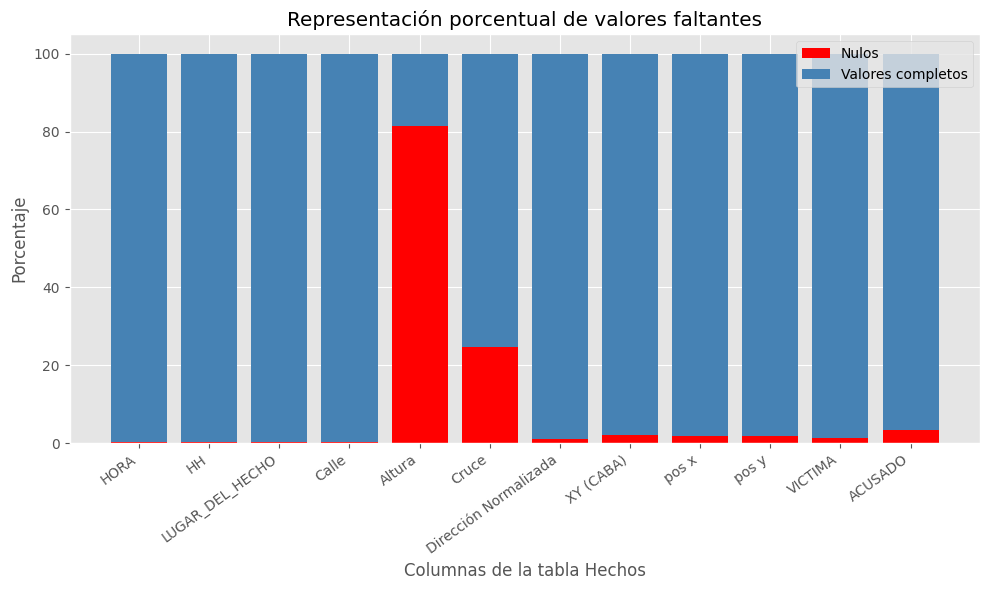

In [188]:
# Listas para los nombres de las columnas y los valores nulos en porcentaje
nombres_columnas = list(diccionario_nulos.keys())
porcentajes = list(diccionario_nulos.values())

# Lista que almacena el complemento para llegar al 100%
complement = [100 - porcentaje for porcentaje in porcentajes]

# Crear el gráfico de barras apilado
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para los valores nulos (parte inferior)
bars2 = ax.bar(nombres_columnas, porcentajes, color='red', label='Nulos')

# Gráfico de barras para los valores complementarios (total-nulos) (parte superior)
bars1 = ax.bar(nombres_columnas, complement,bottom=porcentajes, color='steelblue', label='Valores completos')

# Etiquetas y titulo
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Columnas de la tabla Hechos')
ax.set_title('Representación porcentual de valores faltantes')
ax.legend()

# Rotación de las etiquetas del eje x para que sean legibles
plt.xticks(rotation=36, ha='right')

plt.tight_layout()
plt.show()


Con esto podemos ver que por ejemplo, la columna Altura tiene un porcentaje muy alto de nulos (más de 80%), por lo cuál la información que nos puede proporcionar esta columna es prácticamente insignificante e/o irrelevante. Es entendible que así sea, porque generalmente los accidentes suceden en las esquinas, dónde cruzan dos o más calles y en esos lugares no hay una "Altura" cómo tal.
Siguiendo con el análisis, me llama la atención que la columna "Cruce" sea 2ª columna con más valores nulos por lo que decía anteriormente, ya que según tengo entendido, generalmente los accidentes ocurren en las esquinas, aunque también pueden ocurrir en una situación dónde quizás por ejemplo un auto esté estacionado y venga otro de atrás, que sin verlo, termine chocandolo. Sin embargo, para nuestra buena sorpresa, podemos saber con exactitud dónde ha ocurrido la mayoría de los accidente ya que contamos con dos columnas que representan coordenadas, las cuáles, su cantidad de nulos es baja.

Teniendo esto en consideración, la columna "Altura" posiblemente la elimine, pero antes de ello, posiblemente también elimine aquellas filas en dónde tanto la columna "altura", cómo "cruce" cómo las de las coordenadas, sean vacías.

Voy a hacer el mismo procedimiento con la tabla de víctimas

In [189]:
# Diccionario que me va a servir para mostrar los resultados obtenidos posteriormente
diccionario_nulos = {}
# Bucle que itera cada columna de la tabla víctima
for columna in Victimas.columns:
    # Condicional que evalúa si hay nulos en la columna que se está iterando
    if Victimas[columna].isnull().sum() > 0:
        # Si hay nulos, calcula el total de nulos porcentual con (Victimas[columna].isnull().sum()*100)/717
        print(f"En la columna {columna}, el porcentaje de nulos es de {(Victimas[columna].isnull().sum()*100)/717}")
        # Almacena en el diccionario el nombre de la columna como clave/llave y el porcentaje de los nulos cómo valor
        diccionario_nulos[columna] = (Victimas[columna].isnull().sum()*100)/717
        

En la columna ROL, el porcentaje de nulos es de 1.5341701534170153
En la columna VICTIMA, el porcentaje de nulos es de 1.2552301255230125
En la columna SEXO, el porcentaje de nulos es de 0.8368200836820083
En la columna EDAD, el porcentaje de nulos es de 7.391910739191074
En la columna FECHA_FALLECIMIENTO, el porcentaje de nulos es de 9.483960948396096


In [190]:
diccionario_nulos

{'ROL': 1.5341701534170153,
 'VICTIMA': 1.2552301255230125,
 'SEXO': 0.8368200836820083,
 'EDAD': 7.391910739191074,
 'FECHA_FALLECIMIENTO': 9.483960948396096}

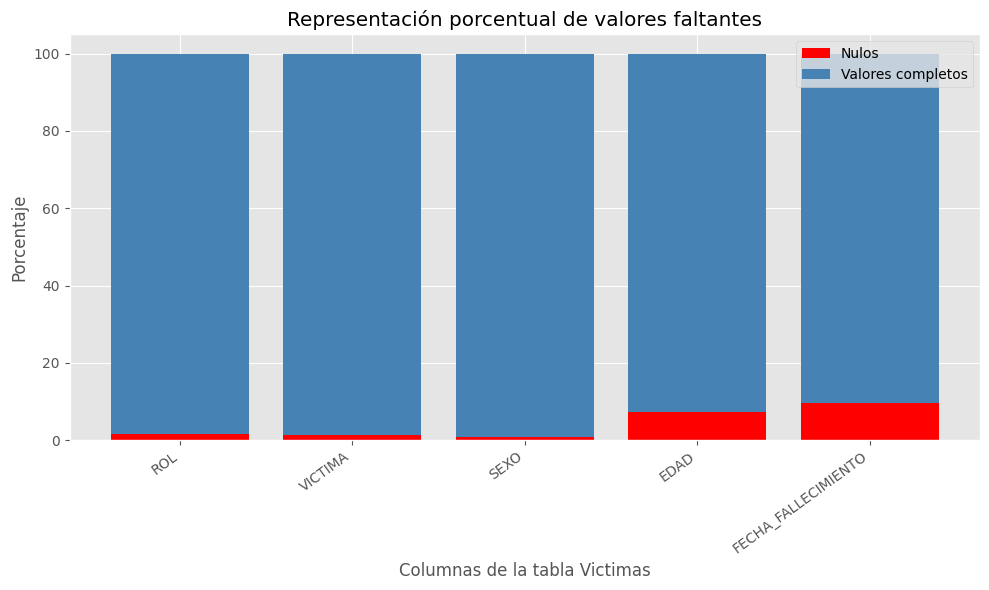

In [191]:
# Listas para los nombres de las columnas y los valores nulos en porcentaje
nombres_columnas = list(diccionario_nulos.keys())
porcentajes = list(diccionario_nulos.values())

# Lista que almacena el complemento para llegar al 100%
complement = [100 - porcentaje for porcentaje in porcentajes]

# Crear el gráfico de barras apilado
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para los valores nulos (parte inferior)
bars2 = ax.bar(nombres_columnas, porcentajes, color='red', label='Nulos')

# Gráfico de barras para los valores complementarios (total-nulos) (parte superior)
bars1 = ax.bar(nombres_columnas, complement,bottom=porcentajes, color='steelblue', label='Valores completos')

# Etiquetas y titulo
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Columnas de la tabla Victimas')
ax.set_title('Representación porcentual de valores faltantes')
ax.legend()

# Rotación de las etiquetas del eje x para que sean legibles
plt.xticks(rotation=36, ha='right')

plt.tight_layout()
plt.show()


Vemos que en la tabla Víctimas hay un porcentaje considerable de valores nulos en la columna Fecha_fallecimiento, los cuáles, por desgracia dadas las caracteristicas de la columna y la información que esta nos proporciona, no contamos con los datos para determinar si esas personas fallecieron o no en el siniestro víal.
Lo más lógico es pensar que sí fallecieron ya que el archivo en dónde vienen los datos se llama "homicidios", pero al no contar con el dato, no podemos suponer un hecho tan importante.
Sin embargo, otra de las cosas que podemos concluir gracias a esta columna es que al menos un 90,5% de las personas que sufren siniestros víales, acaban falleciendo.
La segunda columna con más datos faltantes en la tabla Víctimas es la de "EDAD", aunque el porcentaje de valores faltantes no es muy alto 
(7.39...%) es una lástima no contar con todos los datos de esa columna, ya que se podrían sacar conclusiones interesantes al respecto.

In [192]:
# Lo que voy a hacer a continuación es ver aquellas filas dónde tanto la columna altura, cómo la columna cruce cómo la columna dirección normalizada son nulas
Hechos[(Hechos["Altura"].isnull() & Hechos["Cruce"].isnull() & Hechos["Dirección Normalizada"].isnull())]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20.0,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,NaN,NaN,NaN,MOTO-SD,MOTO,NaN
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0.0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,NaN,NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20.0,NaN,CALLE,...,NaN,NaN,NaN,0,NaN,NaN,NaN,PEATON-SD,PEATON,NaN
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11.0,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,NaN,NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3.0,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,NaN,NaN,NaN,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22.0,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,NaN,NaN,NaN,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6.0,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,NaN,NaN,NaN,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9.0,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,NaN,NaN,NaN,MOTO-CARGAS,MOTO,CARGAS


In [193]:
# Ahora voy a eliminar estas filas de la siguiente manera:
Hechos = Hechos[~(Hechos["Altura"].isnull() & Hechos["Cruce"].isnull() & Hechos["Dirección Normalizada"].isnull())]

Las únicas columnas que eran capaces de salvar a estas filas de ser eliminadas eran "pos x" y "pos y", las cuáles indican coordenadas, pero por lo que vemos, en estas filas, esas columnas tienen un valor nulo, por lo cuál, decido eliminarlas

Comprobamos...

In [194]:
Hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         1
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      0
Altura                   559
Cruce                    163
Dirección Normalizada      0
COMUNA                     0
XY (CABA)                  6
pos x                      4
pos y                      4
PARTICIPANTES              0
VICTIMA                    9
ACUSADO                   21
dtype: int64

Voy a ver aquellas filas en dónde la posición en coordenadas es nula para analizar que puedo hacer

In [195]:
Hechos[Hechos["pos x"].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0.0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,NaN,NaN,NaN,SD-SD,NaN,NaN
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9.0,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,NaN,NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23.0,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,NaN,NaN,NaN,MOTO-PASAJEROS,MOTO,PASAJEROS
559,2020-0039,1,2020-09-01,2020,9,1,19:17:42,19.0,MURGUIONDO 2700,CALLE,...,NaN,NaN,MURGUIONDO,9,NaN,NaN,NaN,PEATON-CARGAS,PEATON,CARGAS


Veo que coinciden los valores nulos en ambas columnas, tanto en la coordenada x cómo en la y, así que decido eliminar estas filas de la siguiente manera

In [196]:
Hechos = Hechos[~Hechos["pos x"].isnull()]

Hago lo mismo con la tabla de Victimas: "ID_hecho, EDAD, FECHA_FALLECIMIENTO"

In [197]:
Victimas[Victimas["VICTIMA"].isnull()]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,NaN,NaN,NaN,NaN,NaN
77,2016-0101,2016-08-07,2016,8,7,NaN,NaN,MASCULINO,67.0,NaN
89,2016-0115,2016-09-02,2016,9,2,NaN,NaN,MASCULINO,NaN,NaN
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,NaN,FEMENINO,NaN,NaN
141,2016-0174,2016-12-27,2016,12,27,NaN,NaN,NaN,NaN,NaN
167,2017-0029,2017-03-07,2017,3,7,NaN,NaN,MASCULINO,34.0,2017-03-07 00:00:00
208,2017-0074,2017-06-04,2017,6,4,NaN,NaN,MASCULINO,70.0,2017-06-04 00:00:00
221,2017-0089,2017-07-13,2017,7,13,NaN,NaN,MASCULINO,23.0,NaN
280,2017-0155,2017-12-12,2017,12,12,NaN,NaN,MASCULINO,77.0,NaN


In [198]:
# Elimino de la tabla Victima, aquellas filas en dónde el valor de la columna "Victima" sea nulo, ya que son valores importantes
Victimas = Victimas[~Victimas["VICTIMA"].isnull()]


In [199]:
Victimas.isnull().sum()                  

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                     3
VICTIMA                 0
SEXO                    4
EDAD                   49
FECHA_FALLECIMIENTO    61
dtype: int64

Ahora, de la tabla Hechos, voy a eliminar la columna "Altura", ya que no me va a servir para mi posterior analisis. Voy a eliminar "Altura", "Cruce" y "XY CABA"

In [200]:
Hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [201]:
Hechos = Hechos[['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle',
       'Dirección Normalizada', 'COMUNA', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO']]

Ahora, voy a observar cada una de las columnas de la tabla de Hechos que me pareció que el tipo de dato debería ser distinto. ("ID, HORA, HH pos x, pos y")

In [202]:
Hechos[["ID",'HORA','HH','pos x', 'pos y']]

,ID,HORA,HH,pos x,pos y
0,2016-0001,04:00:00,4.0,-58.47533969,-34.68757022
1,2016-0002,01:15:00,1.0,-58.50877521,-34.66977709
2,2016-0003,07:00:00,7.0,-58.39040293,-34.63189362
3,2016-0004,00:00:00,0.0,-58.46503904,-34.68092974
4,2016-0005,05:20:00,5.0,-58.38718297,-34.62246630
...,...,...,...,...,...
691,2021-0093,17:10:00,17.0,-58.43353773,-34.64561636
692,2021-0094,01:10:00,1.0,-58.46739825,-34.65117757
693,2021-0095,00:43:00,0.0,-58.47293407,-34.61984745
694,2021-0096,10:30:00,10.0,-58.47066794,-34.65021673


Claro, el ID no es un número cómo debería serlo porque tiene un "-" en el medio. Se vé aparentemente que el formato que eligieron fué: "AÑO-NºHECHO", voy a cambiar esto y lo voy a dejar de esta forma: "AÑONºHECHO", para que quede un número de la forma AAAAHHHH. Hago eso mismo en el código que va a continuación

In [203]:
# Creación de una función que va a cambiar el id 
def modificaID(texto):

    nuevoTexto = texto.replace("-","")

    return nuevoTexto



In [204]:
# Ahora, intercambio los valores y muestro los primeros dos valores 
Hechos["ID"] = Hechos["ID"].apply(modificaID)
print(Hechos["ID"].head(2))

0    20160001
1    20160002
Name: ID, dtype: object


In [205]:
# Ahora hago lo importante que es cambiar el tipo de dato
Hechos["ID"] = Hechos["ID"].astype(int)
Hechos["ID"].head(2)

0    20160001
1    20160002
Name: ID, dtype: int32

A continuación, hago lo mismo con las otras columnas de la tabla Hechos

In [206]:
print(type(Hechos["HORA"][0])) #Hora tiene el formato correcto
print(type(Hechos["HH"][0])) # Esta columna dejo el tipo de dato en float, porque tiene valores nulos y son compatibles con este formato
print(type(Hechos["pos x"][0])) # Cambio el tipo de dato de esta columna
print(type(Hechos["pos y"][0])) # Cambio el tipo de dato de esta columna

Hechos["pos x"] = Hechos["pos x"].astype(float)
Hechos["pos y"] = Hechos["pos y"].astype(float)
 


<class 'datetime.time'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>


In [207]:
print(type(Hechos["pos x"][0]))
print(type(Hechos["pos y"][0])) # Los datos se cambiaron correctamente

<class 'numpy.float64'>
<class 'numpy.float64'>


Ahora, voy a cambiar los tipos de datos de las columnas de la tabla Victimas ("ID_hecho, EDAD, FECHA_FALLECIMIENTO")

In [208]:
Victimas["ID_hecho"] = Victimas["ID_hecho"].apply(modificaID)
Victimas["ID_hecho"].head(2)

0    20160001
1    20160002
Name: ID_hecho, dtype: object

In [209]:
Victimas["ID_hecho"] = Victimas["ID_hecho"].astype(int)

In [210]:
Victimas["EDAD"].value_counts()
# La columna EDAD la voy a dejar cómo está

EDAD
30.0    28
29.0    24
23.0    23
28.0    20
27.0    20
        ..
92.0     1
95.0     1
7.0      1
5.0      1
88.0     1
Name: count, Length: 85, dtype: int64

In [211]:
print(type(Victimas["FECHA_FALLECIMIENTO"][0]))

<class 'datetime.datetime'>


In [212]:
Victimas["FECHA_FALLECIMIENTO"] = pd.to_datetime(Victimas["FECHA_FALLECIMIENTO"])
Victimas["FECHA_FALLECIMIENTO"].head(4)

0   2016-01-01
1   2016-01-02
2   2016-01-03
3          NaT
Name: FECHA_FALLECIMIENTO, dtype: datetime64[ns]

Ahora muestro una breve descripción de cómo me quedaron los Datasets luego de las modificaciones


In [213]:
Hechos.describe()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,COMUNA,pos x,pos y
count,6.840000e+02,684.000000,684,684.00000,684.000000,684.000000,683.000000,684.000000,684.000000,684.000000
mean,2.018206e+07,1.029240,2018-09-18 00:33:41.052631552,2018.19883,6.690058,15.941520,11.654466,7.421053,-58.441545,-34.619632
min,2.016000e+07,1.000000,2016-01-01 00:00:00,2016.00000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250
25%,2.017004e+07,1.000000,2017-04-03 00:00:00,2017.00000,4.000000,9.000000,6.000000,4.000000,-58.476218,-34.643689
50%,2.018008e+07,1.000000,2018-07-16 00:00:00,2018.00000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.622928
75%,2.020000e+07,1.000000,2020-01-04 06:00:00,2020.00000,10.000000,23.000000,17.000000,11.000000,-58.401841,-34.596799
max,2.021010e+07,3.000000,2021-12-30 00:00:00,2021.00000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654
std,1.679665e+04,0.177072,NaN,1.68142,3.576049,8.621338,6.669013,4.373609,0.046144,0.035289


In [214]:
Victimas.describe()

,ID_hecho,FECHA,AAAA,MM,DD,EDAD,FECHA_FALLECIMIENTO
count,7.080000e+02,708,708.000000,708.000000,708.000000,659.000000,647
mean,2.018203e+07,2018-09-16 17:57:57.966101760,2018.196328,6.675141,16.032486,42.075873,2018-11-25 10:38:45.811437312
min,2.016000e+07,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,1.000000,2016-01-01 00:00:00
25%,2.017004e+07,2017-04-13 00:00:00,2017.000000,4.000000,9.000000,27.000000,2017-08-06 12:00:00
50%,2.018007e+07,2018-07-14 12:00:00,2018.000000,7.000000,16.000000,37.000000,2018-09-29 00:00:00
75%,2.020000e+07,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,56.000000,2020-03-07 00:00:00
max,2.021010e+07,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,95.000000,2022-01-03 00:00:00
std,1.669084e+04,NaN,1.670829,3.580017,8.674065,19.746271,NaN


Como siguiente paso, lo que voy a hacer es eliminar las columnas que considere innecesarias o repetidas / duplicadas y voy a renombrarlas si lo considero necesario.

Comienzo eliminando columnas

In [215]:
Hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Dirección Normalizada',
       'COMUNA', 'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

 Lo primero que noto es que tengo 6 columnas de las 21 de la tabla de hechos que son de tipo temporales, es decir, indican un tiempo. 
 Analizando las primeras 4 (Fecha, AAAA, MM, DDD), decido que puedo tomarme la libertad de eliminar las últimas 3, ya que resultan redundantes.
 Las ultimas 2 de las 6, Hora y HH las dejo tal cual para un análisis posterior, porque pese a que "Hora" me aporta más información (los minutos), puedo hacer un análisis mucho más eficiente de las horas con la columna "HH"

In [216]:
Hechos[['ID', 'N_VICTIMAS', 'FECHA', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle',
       'Dirección Normalizada', 'COMUNA', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO']].head(2)

,ID,N_VICTIMAS,FECHA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,20160001,1,2016-01-01,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,20160002,1,2016-01-02,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS


In [217]:
Hechos = Hechos[['ID', 'N_VICTIMAS', 'FECHA', 'HORA', 'HH', 'TIPO_DE_CALLE', 'Calle',
       'Dirección Normalizada', 'COMUNA', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO']]

Me pasa que siento que hay demasiadas columnas que indican la dirección del hecho (LUGAR_DEL_HECHO, Calle, Altura, Cruce, Dirección Normalizada, XY (CABA), pos x, pos y). En total son 8 columnas que indican prácticamente cosas similares, o que se complementan entre sí. 
Para mi análisis, voy a dejar de esas 8, sólo 5 columnas: "Tipo de calle, Calle, Dirección normalizada, pos x, pos y", y bueno la comuna que no es una dirección cómo tal, sino más bien un indicador regional

Ahora sigo con la tabla de victimas (eliminando columnas)

In [218]:
Victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [219]:
# Nuevamente, tengo 5 columnas que hacen referencia a variables temporales, así que elimino 4 de las 5 que me resultan redundantes. Las primeras 4 (Fecha, aaaa, mm, dd) hacen referencia a la fecha en la que ocurrió el hecho, esto ya lo tengo en la tabla de Hechos, ya tengo una fecha, la columna temporal que aporta nueva información es la última de estas 5, llamada Fecha_fallecimiento, así que esa la conservo
Victimas[['ID_hecho',"FECHA",  'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO']] 

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,20160001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01
1,20160002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02
2,20160003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03
3,20160004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18.0,NaT
4,20160005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01
...,...,...,...,...,...,...,...
712,20210092,2021-12-12,PEATON,PEATON,FEMENINO,50.0,2021-12-12
713,20210093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2021-12-18
714,20210094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,2021-12-20
715,20210095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27.0,2022-01-02


Esas 7 columnas me van a ser útil para mi posterior análisis así que decido conservarlas.

In [220]:
Victimas = Victimas[['ID_hecho',"FECHA",  'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO']] 
Victimas.head(1)

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,20160001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01


Ahora voy a renombrar las columnas de ambas tablas dónde no sea muy clara el nombre con relación a la información que proporcionan, basandome en el diccionario de datos

In [221]:
Hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'HORA', 'HH', 'TIPO_DE_CALLE', 'Calle',
       'Dirección Normalizada', 'COMUNA', 'pos x', 'pos y', 'PARTICIPANTES',
       'VICTIMA', 'ACUSADO'],
      dtype='object')

In [222]:
Hechos = Hechos.rename(columns={'ID':'ID_HECHO', 'N_VICTIMAS':'CANTIDAD_VICTIMAS',
       'Dirección Normalizada':'DIRECCION_HECHO', 'pos x':'POS_X', 'pos y':'POS_Y', 'Calle':'CALLE'})
Hechos.head(1)

,ID_HECHO,CANTIDAD_VICTIMAS,FECHA,HORA,HH,TIPO_DE_CALLE,CALLE,DIRECCION_HECHO,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
0,20160001,1,2016-01-01,04:00:00,4.0,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO


In [223]:
Victimas.columns

Index(['ID_hecho', 'FECHA', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

In [224]:
Victimas = Victimas.rename(columns={'ID_hecho':'ID_HECHO','VICTIMA':'MEDIO_TRANSPORTE'})
Victimas.head(1)

,ID_HECHO,FECHA,ROL,MEDIO_TRANSPORTE,SEXO,EDAD,FECHA_FALLECIMIENTO
0,20160001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01


Ahora voy a ver la cantidad de celdas vacías en cada columna de ambas tablas.

In [225]:
Hechos.isnull().sum()

ID_HECHO              0
CANTIDAD_VICTIMAS     0
FECHA                 0
HORA                  1
HH                    1
TIPO_DE_CALLE         0
CALLE                 0
DIRECCION_HECHO       0
COMUNA                0
POS_X                 0
POS_Y                 0
PARTICIPANTES         0
VICTIMA               8
ACUSADO              20
dtype: int64

In [231]:
Hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 695
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_HECHO           684 non-null    int32         
 1   CANTIDAD_VICTIMAS  684 non-null    int64         
 2   FECHA              684 non-null    datetime64[ns]
 3   HORA               683 non-null    object        
 4   HH                 683 non-null    float64       
 5   TIPO_DE_CALLE      684 non-null    object        
 6   CALLE              684 non-null    object        
 7   DIRECCION_HECHO    684 non-null    object        
 8   COMUNA             684 non-null    int64         
 9   POS_X              684 non-null    float64       
 10  POS_Y              684 non-null    float64       
 11  PARTICIPANTES      684 non-null    object        
 12  VICTIMA            676 non-null    object        
 13  ACUSADO            664 non-null    object        
dtypes: datetime64[n

Veo que la columna Acusado es la columna que más celdas vacías tiene, aunque no es una cantidad considerable, si repito el procedimiento anterior para ver los porcentajes...

In [234]:
# Diccionario que me va a servir para mostrar los resultados obtenidos posteriormente
diccionario_nulos = {}
# Bucle que itera cada columna de la tabla hechos
for columna in Hechos.columns:
    # Condicional que evalúa si hay nulos en la columna que se está iterando
    if Hechos[columna].isnull().sum() > 0:
        # Si hay nulos, calcula el total de nulos porcentual con (Hechos[columna].isnull().sum()*100)/696
        print(f"En la columna {columna}, el porcentaje de nulos es de {(Hechos[columna].isnull().sum()*100)/684}")
        # Almacena en el diccionario el nombre de la columna como clave/llave y el porcentaje de los nulos cómo valor
        diccionario_nulos[columna] = (Hechos[columna].isnull().sum()*100)/684
        

En la columna HORA, el porcentaje de nulos es de 0.14619883040935672
En la columna HH, el porcentaje de nulos es de 0.14619883040935672
En la columna VICTIMA, el porcentaje de nulos es de 1.1695906432748537
En la columna ACUSADO, el porcentaje de nulos es de 2.9239766081871346


Veo que la cantidad de nulos en la columna ACUSADO de forma porcentual no llega al 3%, siendo esta la mayor columna con nulos, decido conservar las columnas tal cuál están, ya que no me parecen cantidades significativas ni de columnas ni de celdas vacías

Repito el mismo procedimiento con la tabla Victimas

In [233]:
Victimas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 716
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_HECHO             708 non-null    int32         
 1   FECHA                708 non-null    datetime64[ns]
 2   ROL                  705 non-null    object        
 3   MEDIO_TRANSPORTE     708 non-null    object        
 4   SEXO                 704 non-null    object        
 5   EDAD                 659 non-null    float64       
 6   FECHA_FALLECIMIENTO  647 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(1), object(3)
memory usage: 57.6+ KB


In [116]:
Victimas.isnull().sum() 

ID_HECHO                0
ROL                    11
MEDIO_TRANSPORTE        9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

In [235]:
diccionario_nulos = {}
for columna in Victimas.columns:
    if Victimas[columna].isnull().sum() > 0:
        print(f"En la columna {columna}, el porcentaje de nulos es de {(Victimas[columna].isnull().sum()*100)/708}")
        # Almacena en el diccionario el nombre de la columna como clave/llave y el porcentaje de los nulos cómo valor
        diccionario_nulos[columna] = (Victimas[columna].isnull().sum()*100)/708
        

En la columna ROL, el porcentaje de nulos es de 0.423728813559322
En la columna SEXO, el porcentaje de nulos es de 0.5649717514124294
En la columna EDAD, el porcentaje de nulos es de 6.9209039548022595
En la columna FECHA_FALLECIMIENTO, el porcentaje de nulos es de 8.615819209039548


Bueno, luego de la limpieza, noto que el porcentaje más alto de nulos está presente en la columna fecha de fallecimiento, una lástima, porque se podrían sacar conclusiones interesantes con este tipo de dato, cómo el promedio de tiempo que tardan las personas que sufrieron cierto accidente en fallecer.
La segunda columna con más valores faltantes es la de la edad, también es una lástima porque se podrían sacar conclusiones más precisas del rango etario más afectado por los accidentes en siniestros viales.
Las otras dos columnas no tienen un porcentaje significativo de valores nulos cómo para tenerlas en consideración

# Manejo de duplicados

In [238]:
Hechos[Hechos.duplicated()] # No hay duplicados

,ID_HECHO,CANTIDAD_VICTIMAS,FECHA,HORA,HH,TIPO_DE_CALLE,CALLE,DIRECCION_HECHO,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO


In [239]:
Victimas[Victimas.duplicated()] # No hay duplicados

,ID_HECHO,FECHA,ROL,MEDIO_TRANSPORTE,SEXO,EDAD,FECHA_FALLECIMIENTO


# Exportación de datos
Ya hice todas las transformaciones y ediciones que consideré necesarias, así que ahora, lo que voy a hacer es exportar las tablas en formato csv para posteriormente hacer un Dashboard en Power BI

In [240]:
Hechos.to_csv("TablaHechos.csv")
Victimas.to_csv("TablaVictimas.csv")

Ahora voy a profundizar en las distribuciones de las columnas, y sus caracteristicas intrinsecas. 

Para esto voy a usar
    - Histograma
    - KDE
    - Boxplot

In [120]:
print(Hechos.columns)
print(Victimas.columns)

Index(['ID_HECHO', 'CANTIDAD_VICTIMAS', 'FECHA', 'HORA', 'TIPO_DE_CALLE',
       'DIRECCION_HECHO', 'COMUNA', 'POS_X', 'POS_Y', 'PARTICIPANTES',
       'VICTIMA', 'ACUSADO'],
      dtype='object')
Index(['ID_HECHO', 'ROL', 'MEDIO_TRANSPORTE', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')


In [121]:
Hechos['FECHA'].dt.year.value_counts()

FECHA
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64

Voy a mostrar esta distribución usando un gráfico de barras

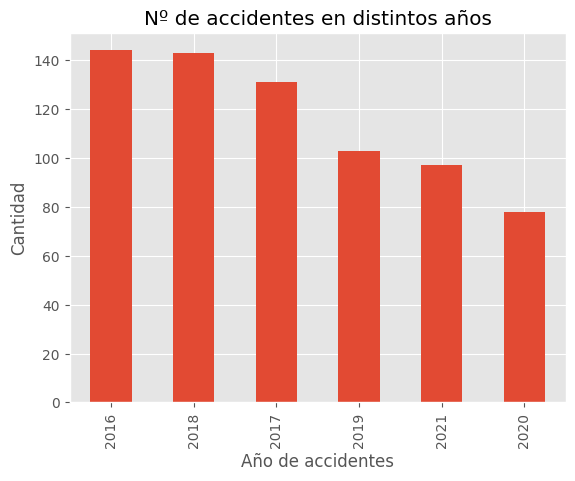

In [122]:
ax = Hechos['FECHA'].dt.year.value_counts() \
    .plot(kind='bar', title='Nº de accidentes en distintos años')
ax.set_xlabel('Año de accidentes')
ax.set_ylabel('Cantidad')
plt.show()

Hago lo mismo con los meses

In [123]:
Hechos['FECHA'].dt.month.value_counts()

FECHA
12    78
11    67
8     65
1     62
5     60
6     58
2     56
3     51
7     51
10    51
4     50
9     47
Name: count, dtype: int64

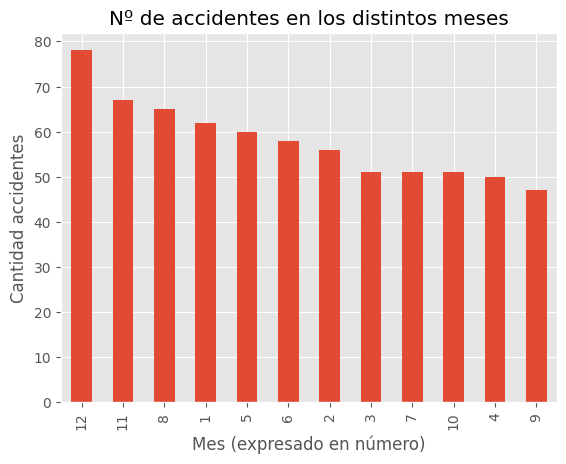

In [124]:
ax = Hechos['FECHA'].dt.month.value_counts() \
    .plot(kind='bar', title='Nº de accidentes en los distintos meses')
ax.set_xlabel('Mes (expresado en número)')
ax.set_ylabel('Cantidad accidentes')
plt.show()

Hago lo mismo con las horas (formato 24hs)

In [125]:
pd.to_datetime(Hechos["HORA"], format='%H:%M:%S').dt.hour.value_counts()

HORA
7.0     41
6.0     40
9.0     36
5.0     35
14.0    33
12.0    32
8.0     31
18.0    31
10.0    31
16.0    30
19.0    30
17.0    30
22.0    30
21.0    29
23.0    28
11.0    27
3.0     26
20.0    26
15.0    25
1.0     24
4.0     23
0.0     23
2.0     17
13.0    17
Name: count, dtype: int64

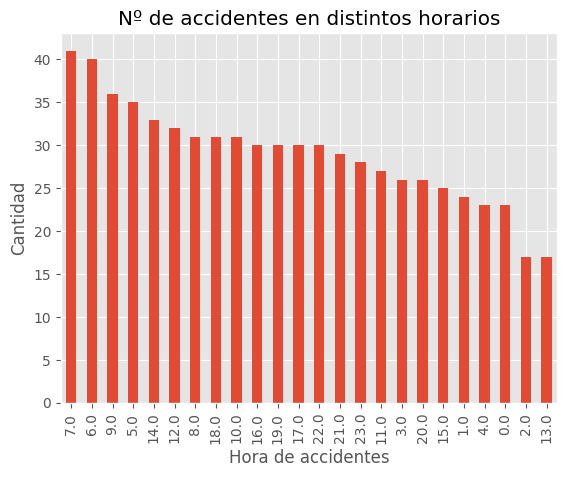

In [126]:
ax = pd.to_datetime(Hechos["HORA"], format='%H:%M:%S').dt.hour.value_counts() \
    .plot(kind='bar', title='Nº de accidentes en distintos horarios')
ax.set_xlabel('Hora de accidentes')
ax.set_ylabel('Cantidad')
plt.show()

Voy a ver, por último, en el tipo de calle en la que suelen ocurrir los accidentes

In [127]:
Hechos["TIPO_DE_CALLE"].value_counts()

TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

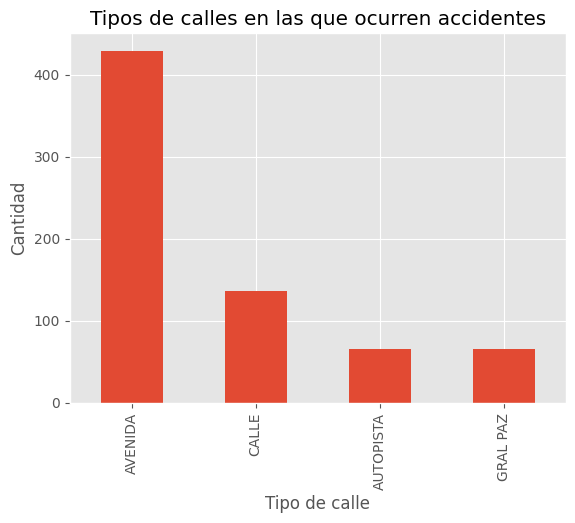

In [128]:
ax = Hechos["TIPO_DE_CALLE"].value_counts() \
    .plot(kind='bar', title='Tipos de calles en las que ocurren accidentes')
ax.set_xlabel('Tipo de calle')
ax.set_ylabel('Cantidad')
plt.show()

Ahora represento este gráfico de otra manera

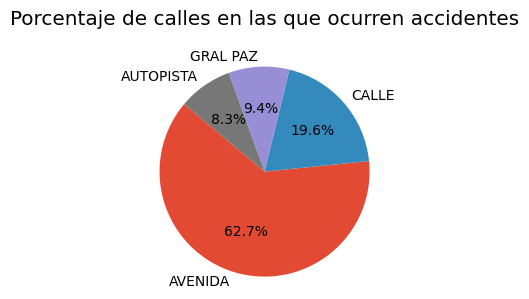

In [101]:
Cuenta = Hechos["TIPO_DE_CALLE"].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(6, 3))
plt.pie(Cuenta, labels=Cuenta.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de calles en las que ocurren accidentes', y=1.1)
plt.axis('equal')  # Asegurar que el gráfico sea circular

# Mostrar el gráfico
plt.show()


Ahora voy a hacer algunos gráficos descriptivos con la tabla de víctimas

In [129]:
# 'ID_HECHO', 'ROL', 'VICTIMA', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'
Victimas["ROL"].value_counts()

ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
Name: count, dtype: int64

In [130]:
Victimas["ROL"] = Victimas["ROL"].replace("PASAJERO_ACOMPAÑANTE","ACOMPAÑANTE")

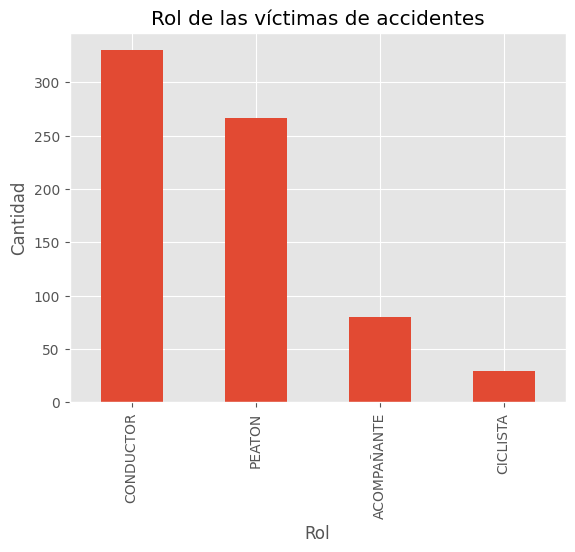

In [131]:
ax = Victimas["ROL"].value_counts() \
    .plot(kind='bar', title='Rol de las víctimas de accidentes')
ax.set_xlabel('Rol')
ax.set_ylabel('Cantidad')
plt.show()

Ahora los distintos vehículos o medios de transporte que resultan victimas de un accidente

In [132]:
Victimas["MEDIO_TRANSPORTE"].value_counts()

MEDIO_TRANSPORTE
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

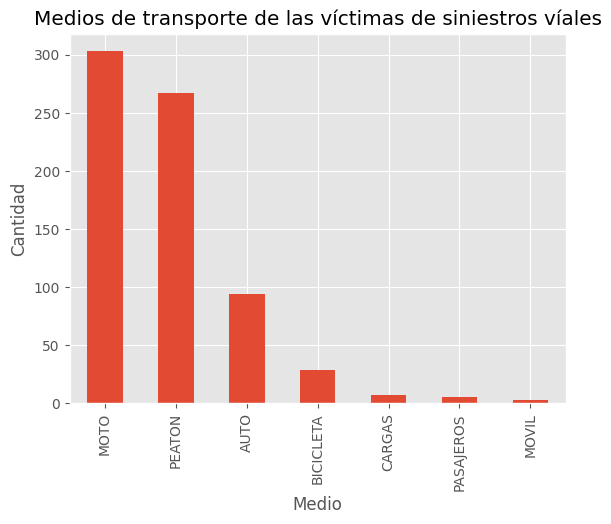

In [133]:
ax = Victimas["MEDIO_TRANSPORTE"].value_counts() \
    .plot(kind='bar', title='Medios de transporte de las víctimas de siniestros víales')
ax.set_xlabel('Medio')
ax.set_ylabel('Cantidad')
plt.show()

Con todos los gráficos que acabo de mostrar a continuación, puedo sacar una conclusión, que requerirá de más análisis, pero a simple vista, en diciembre de 2016 y/o 2018, si andabas en moto por una avenida a las 7am eras mucho más propenso a ser víctima de un siniestro víal

In [134]:
print(Hechos.columns)

Index(['ID_HECHO', 'CANTIDAD_VICTIMAS', 'FECHA', 'HORA', 'TIPO_DE_CALLE',
       'DIRECCION_HECHO', 'COMUNA', 'POS_X', 'POS_Y', 'PARTICIPANTES',
       'VICTIMA', 'ACUSADO'],
      dtype='object')


In [84]:
# Crear el histograma de 'CANTIDAD_VICTIMAS'
plt.figure(figsize=(10, 6))
plt.hist(Hechos['N_VICTIMAS'], bins=range((Hechos['N_VICTIMAS'].min(), Hechos['N_VICTIMAS'].max() + 2)), edgecolor='black')
plt.title('Histograma de la Cantidad de Víctimas')
plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Frecuencia')
plt.xticks(range(Hechos['N_VICTIMAS'].min(), Hechos['CANTIDAD_VICTIMAS'].max() + 1))
plt.grid(axis='y')

# Mostrar el histograma
plt.show()

TypeError: 'tuple' object cannot be interpreted as an integer

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Speed (mph)')

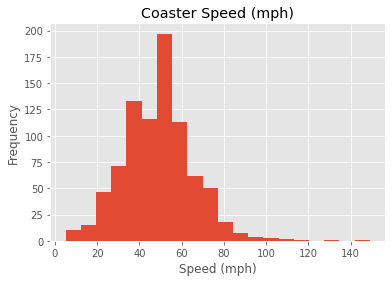

In [ ]:
ax = df['Speed_mph'].plot(kind='hist',
                          bins=20,
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

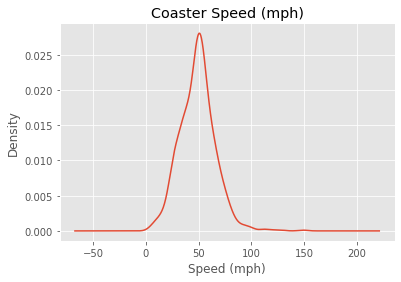

In [ ]:
ax = df['Speed_mph'].plot(kind='kde',
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

In [ ]:
df['Type_Main'].value_counts()

Steel    728
Wood     191
Other     71
Name: Type_Main, dtype: int64

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

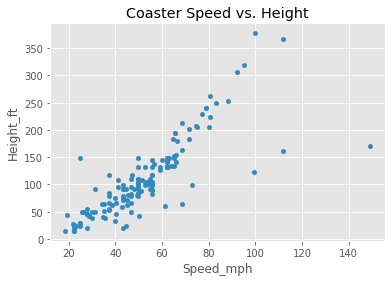

In [ ]:
df.plot(kind='scatter',
        x='Speed_mph',
        y='Height_ft',
        title='Coaster Speed vs. Height')
plt.show()

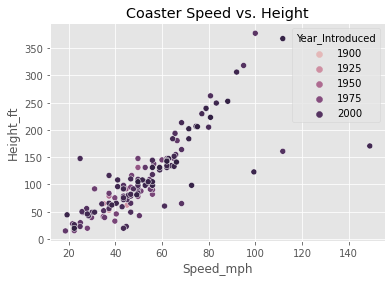

In [ ]:
ax = sns.scatterplot(x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced',
                data=df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

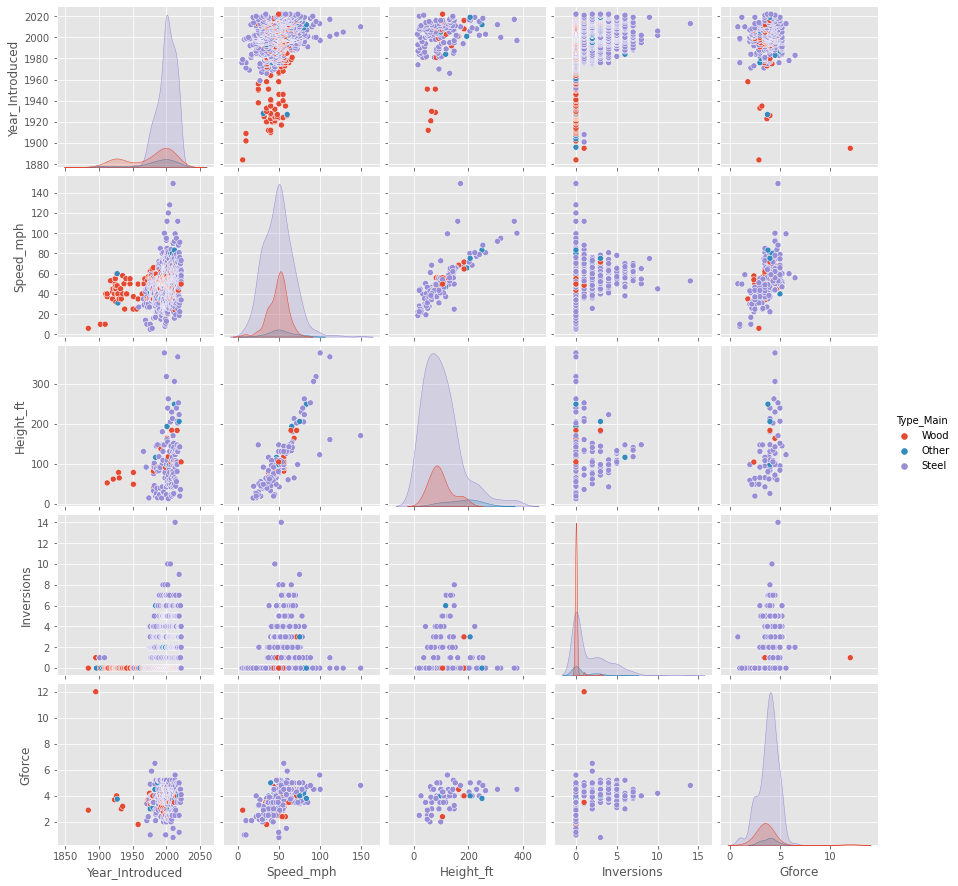

In [ ]:
sns.pairplot(df,
             vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
            hue='Type_Main')
plt.show()

In [ ]:
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<AxesSubplot:>

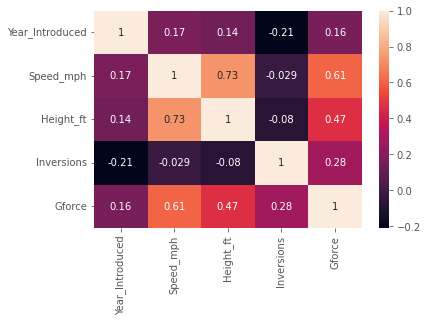

In [ ]:
sns.heatmap(df_corr, annot=True)

# Step 5: Ask a Question about the data
- Try to answer a question you have about the data using a plot or statistic.

What are the locations with the fastest roller coasters (minimum of 10)?

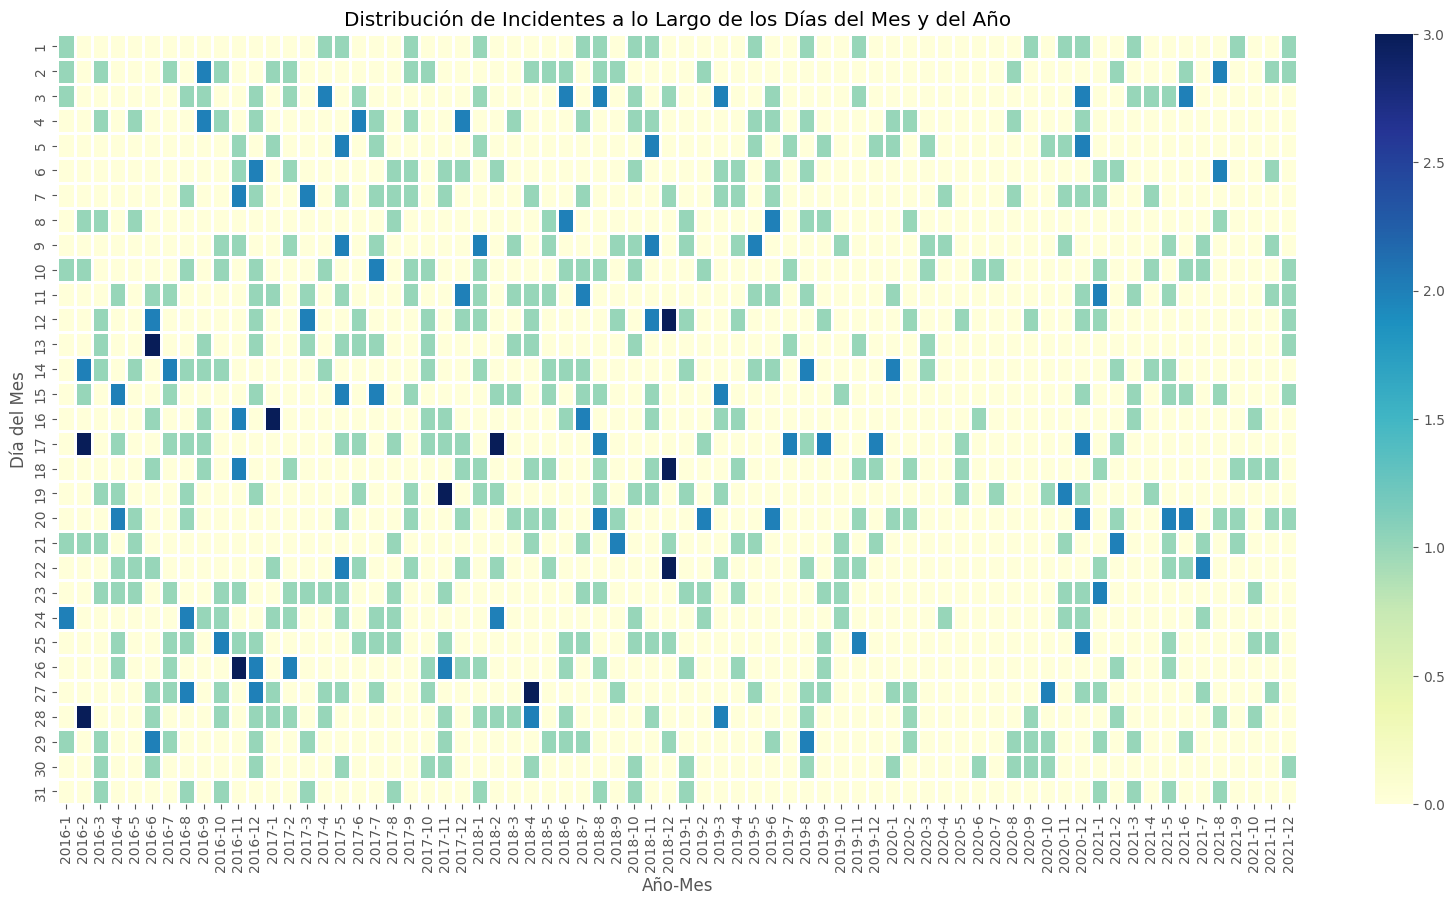

In [62]:

# Suponiendo que tus datos están en un DataFrame llamado 'Hechos'
# y que la columna 'FECHA' está en formato 'AAAA-MM-DD'

# Leer los datos (si no lo has hecho ya)
# Hechos = pd.read_csv('datos.csv')

# Convertir la columna 'FECHA' a tipo datetime
Hechos['FECHA'] = pd.to_datetime(Hechos['FECHA'])

# Extraer el año, mes y día de la fecha
Hechos['AÑO'] = Hechos['FECHA'].dt.year
Hechos['MES'] = Hechos['FECHA'].dt.month
Hechos['DÍA'] = Hechos['FECHA'].dt.day

# Contar el número de incidentes por día
incidentes_por_día = Hechos.groupby(['AÑO', 'MES', 'DÍA']).size().reset_index(name='INCIDENTES')

# Crear una tabla de pivote con el número de incidentes por día
heatmap_data = incidentes_por_día.pivot_table(index='DÍA', columns=['AÑO', 'MES'], values='INCIDENTES', fill_value=0)



# Crear el heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.8)
plt.title('Distribución de Incidentes a lo Largo de los Días del Mes y del Año')
plt.xlabel('Año-Mes')
plt.ylabel('Día del Mes')
plt.show()


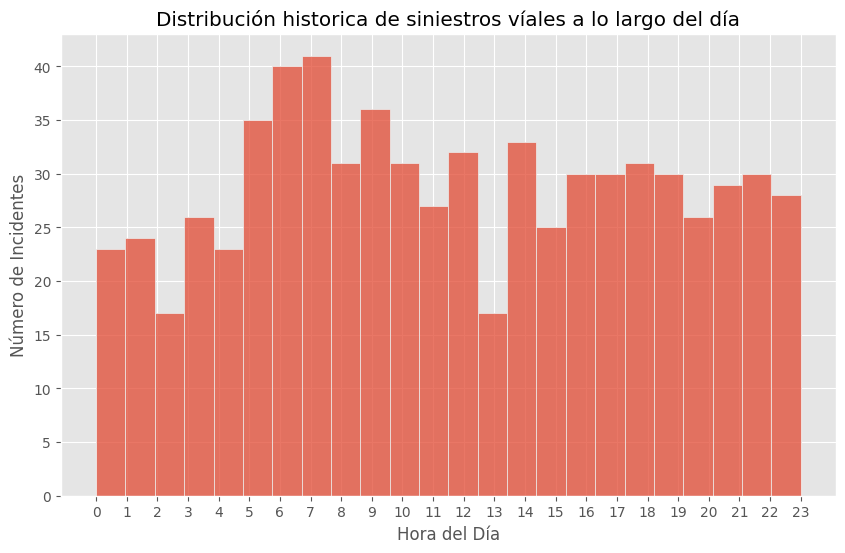

In [75]:
# Leer los datos (si no lo has hecho ya)
Hechos['HH'] = Hechos['HH'].replace("SD",np.NaN)
# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(Hechos['HH'], bins=24, kde=False)
plt.title('Distribución historica de siniestros víales a lo largo del día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Incidentes')
plt.xticks(range(0, 24))  # Asegurar que todas las horas del día se muestran en el eje x
plt.grid(True)
plt.show()


In [4]:
Hechos["FECHA"] = pd.to_datetime(Hechos["FECHA"])

In [27]:
Hechos['FECHA'].dt.to_period('M').dt.strftime('%m')

0      01
1      01
2      01
3      01
4      01
       ..
691    12
692    12
693    12
694    12
695    11
Name: FECHA, Length: 696, dtype: object

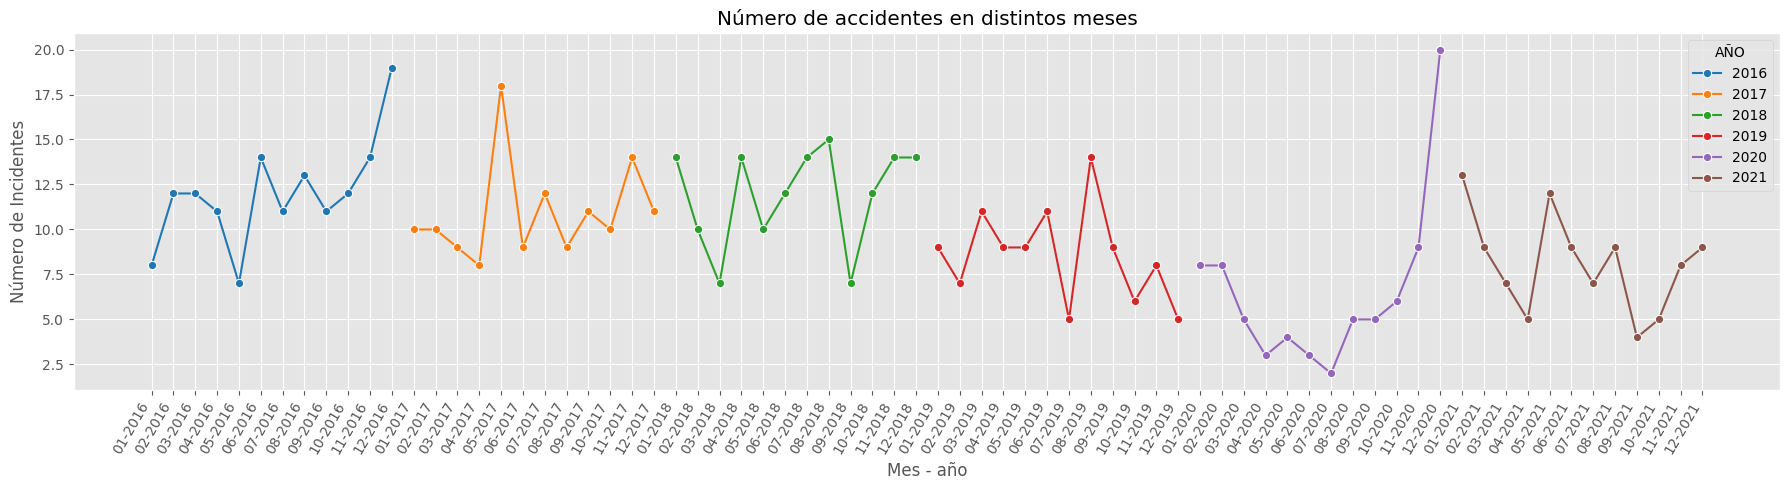

In [50]:
# Extraigo el año y el mes de la columna fecha
Hechos['AÑO'] = Hechos['FECHA'].dt.year
Hechos['MES_AÑO'] = Hechos['FECHA'].dt.to_period('M').dt.strftime('%m-%Y')

# Agrupar los datos por año y mes y contar el número de incidentes por mes
incidentes_por_mes = Hechos.groupby(['AÑO', 'MES_AÑO']).size().reset_index(name='INCIDENTES')

# Gráfico de la serie temporal
# Tamaño
plt.figure(figsize=(18, 5))
# Tipo de gráfico y variables que tiene en cuenta
sns.lineplot(data=incidentes_por_mes, x='MES_AÑO', y='INCIDENTES', hue='AÑO', marker='o', palette='tab10')
# Titulo
plt.title('Número de accidentes en distintos meses')
plt.xlabel('Mes - año')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


Otra forma de representarlo...

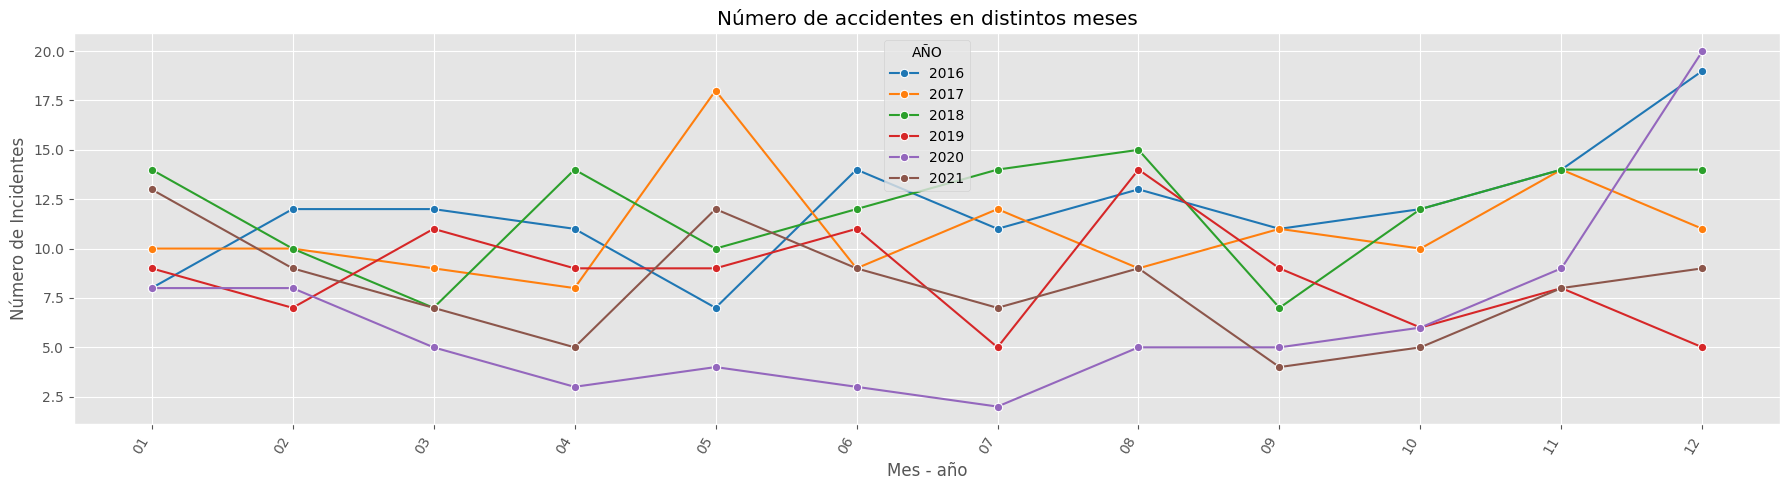

In [51]:
# Extraigo el año y el mes de la columna fecha
Hechos['AÑO'] = Hechos['FECHA'].dt.year
Hechos['MES_AÑO'] = Hechos['FECHA'].dt.to_period('M').dt.strftime('%m')

# Agrupar los datos por año y mes y contar el número de incidentes por mes
incidentes_por_mes = Hechos.groupby(['AÑO', 'MES_AÑO']).size().reset_index(name='INCIDENTES')

# Gráfico de la serie temporal
# Tamaño
plt.figure(figsize=(18, 5))
# Tipo de gráfico y variables que tiene en cuenta
sns.lineplot(data=incidentes_por_mes, x='MES_AÑO', y='INCIDENTES', hue='AÑO', marker='o', palette='tab10')
# Titulo
plt.title('Número de accidentes en distintos meses')
plt.xlabel('Mes - año')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


## KPI

Para hacer los KPI, tomé la población total de CABA del censo de 2022 y la del censo de 2010 e hice calculos a partir de estos datos, ya que desconocía la población total en el primer y segundo semestre de 2021, pero la estimé

In [ ]:
poblacion_caba_2022 = 3120612
poblacion_caba_2010 = 2890151

In [ ]:
crecimiento_poblacional_ult_12_años = poblacion_caba_2022 - poblacion_caba_2010
print(crecimiento_poblacional_ult_12_años)

230461


In [ ]:
crecimiento_por_año = crecimiento_poblacional_ult_12_años / 12
print(crecimiento_por_año)

19205.083333333332


In [ ]:
crecimiento_por_semestre = crecimiento_por_año / 2
print(crecimiento_por_semestre)

9602.541666666666


In [ ]:
poblacion_CABA_2021 = poblacion_caba_2022 - crecimiento_por_año # O también podría ser: población_caba_2010 + crecimiento_por_año * 11
print(poblacion_CABA_2021)

3101406.9166666665


In [ ]:
poblacion_CABA_2021_sem_1 = int(poblacion_CABA_2021) - int(crecimiento_por_semestre)
poblacion_CABA_2021_sem_2 = int(poblacion_CABA_2021)
print(poblacion_CABA_2021_sem_1, poblacion_CABA_2021_sem_2)

3091804 3101406
